In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from SimulDensPerf import *
from scipy.stats import norm

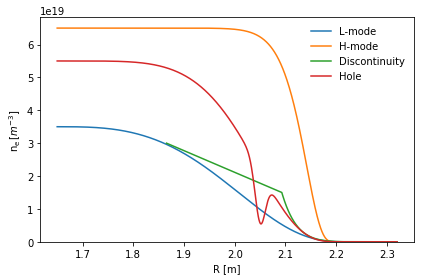

In [2]:
rlmode, dlmode = SimulDensPerf(dens0=3.5e19, m=3, n=3, npts=1000)
rhmode, dhmode = SimulDensPerf(dens0=6.5e19, R0=2.2, m=15, n=5, npts=1000)

#Discontinuity
x = np.linspace(0,1, num=500)
x2 = np.linspace(1,2, num=500)
y = x**8
y2 = x2
rdis = np.concatenate((x,x2), axis=0)
ndis = np.concatenate((y,y2), axis=0)*1.5e19
rdis = 2.32 - rdis/4.4
#"Hole"
rhole, dhole = SimulDensPerf(dens0=5.5e19, m=5, n=5, npts=1000)
dmhole = norm.pdf(rhole, 2.05, 0.01)*4e17

#
plt.plot(rlmode, dlmode, label='L-mode')
plt.plot(rhmode, dhmode, label='H-mode')
plt.plot(rdis, ndis, label='Discontinuity')
plt.plot(rhole, dhole-dmhole, label='Hole')
plt.legend(frameon=False)
plt.ylim(bottom=0)
plt.ylabel(r'$\mathrm{n_{e}}\,[m^{-3}]$')
plt.xlabel('R [m]')
plt.tight_layout()
plt.savefig('Profile_Examples.png',dpi=300)